# A $\pi$-rrational problem!

I ran across an interesting problem on one of my last quizzes.
Sometimes a problem strikes me a certain way, and I have to roll it around in my head until I can sort it out for myself.
I have poked at this a few times, but it has been a crazy busy year for me.
Lazy weekends with little to do are few and far between!
I finally sat down with my notebook and scribbled my way to a solution (I hope!).

This is a raw, unfiltered excursion.
I am a hobbyist at best, so please bear with my complete lack of rigor.

## Quiz me

Consider the sequence:

$$s(n) = \frac{1}{\sin{2n}} \text{ for all }n\in \mathbb{N}$$

Is it:
- divergent
- unbounded
- infinite
- Cauchy
- monotone

I encourage you to pause and figure this out for yourself.
It is not difficult to reach a correct conclusion even if you simply rely on some graphed values.
As I was thinking about the problem, I wondered how I might approach it if I had to answer it in a different context.
What if you were asked to **prove** why this sequence behaves the way it does?
Here is a graph of some values:

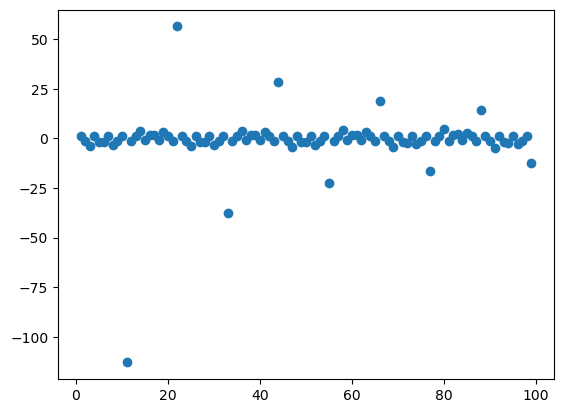

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import mpmath as mp

x = np.arange(1, 100, 1)
plt.scatter(x, 1/np.sin(2*x))

Looking at these first several values, one might be tempted to think that this sequence is indeed bounded.
Visual patterns can be misleading!

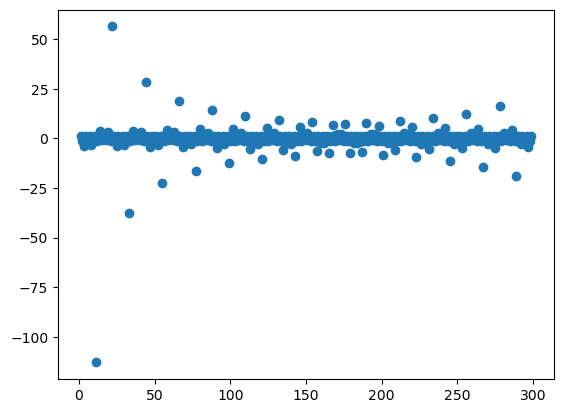

In [34]:
x = np.arange(1, 300, 1)
plt.scatter(x, 1/np.sin(2*x))

Oh, now it looks like it is starting to diverge.
What if we look a little further out?

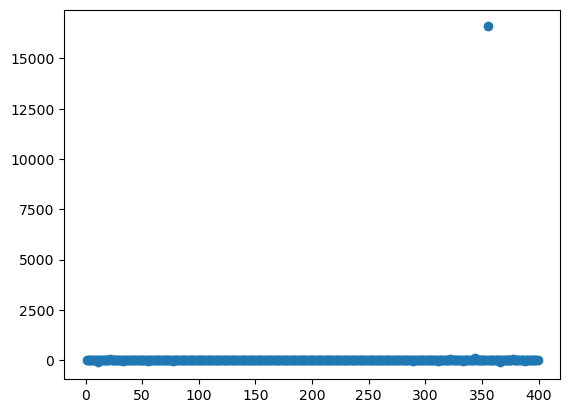

In [35]:
x = np.arange(1, 400, 1)
plt.scatter(x, 1/np.sin(2*x))

I hope that you are convinced at this point that the series in question is indeed unbounded!

## Spinning in circles

I think this puzzle stuck with me because my research on the RSA algorithm feels closely related.
We are trying to find values of $\sin{2n}$ that are near zero.
This will cause the output of our sequence to blow up to either positive or negative infinity.
The challenge feels to me a bit like finding a modular inverse.
Given some value, what do we have to multiply by to get a certain remainder?
I may be a lowly undergraduate, but I paid enough attention in class to remember that $\pi$ is irrational. 😂
I knew this line of thinking wouldn't work, but it got my wheels spinning in the right direction.

Since $\pi$ is irrational, there is no common ratio between multiples of it and any integer or rational number.
On the other hand, we are dealing with a sequence based on natural numbers, maybe there is a connection?
Our input set is {2, 4, 6, 8, 10, ...}.
What if I write down the input and the closest multiple of $\pi$?
For example, 3 is closest to $1\pi$, 6 is closest to $2\pi$, etc.

- 4/1
- 6/2
- 8/2
- 10/3
- 12/3
- 14/4
- 16/4
- 18/5
- 22/7
- 24/8

Does anything stand out to you?
We are dealing with $\pi$, and $\frac{22}{7}$ is an approximation you should have learned in grade school.
Are we on to something?

```
1/sin(2) = 1.0997501702946164
1/sin(4) = -1.3213487088109024
1/sin(6) = -3.5788995472544056
1/sin(8) = 1.010756218400097
1/sin(10) = -1.8381639608896658
1/sin(12) = -1.8636795977824385
1/sin(14) = 1.0094817025647271
1/sin(16) = -3.4733882595849295
1/sin(18) = -1.3315805352205026
1/sin(20) = 1.0953559364080034
1/sin(22) = -112.97763609776322
1/sin(24) = -1.1042
```

22 is certainly an outlier!
I think we have a plan of attack!

A common ratio doesn't exist, so intuition tells us that we can get arbitrarily close to multiples of $\pi$ by using rational approximations without ever hitting the exact value of $\pi$.
That will result in $\sin{n}$ getting arbitrarily close to zero and the output of our sequence will blow up (1 divided by a tiny number is a big number).

I will rephrase the scenario in case you are lost in my rambling.
We are spinning around a circle that has a circumference of $2\pi$, but we are stepping along by a value of 2.
Get out a piece of paper and draw this out.
2 gets you almost to $\pi$ radians, 4 puts you past $\pi$ radians, 6 lands right before a complete trip around the circle.
Here is the rub, the next "jump" doesn't start at 0, it starts at the irrational difference between 6 and $2\pi$.
As we continue to spin around the circle in these steps of 2 units, we will land at infinitely many different points around the circle.
What I am trying to do is determine if we can compute *when and where* we will land given some arbitrary precision.

Arbitrarily close? 🤔
I think it's time to dig out the Real Analysis book.
It sounds to me like we can make a $\delta$, $\epsilon$ argument to prove the sequence diverges!
But first, we need a way to generate rational approximations to $\pi$.

## Approximating $\pi$, AKA chase a rabbit down a hole

Approximations make me recall my numerical analysis class.
Sure enough, we were asked to make a rational approximation of $\pi$ using the $\arctan$ function.

$$\arctan{x} = \lim_{n\rightarrow \infty} P_n(x) = \lim_{n\rightarrow \infty} \sum_{i=1}^{n}(-1)^{i+1}\frac{x^{2i-1}}{2i-1}$$

$\arctan{\frac{\pi}{4}} = 1$, so we can plug in $x=1$ and multiply the result by 4 (Burden & Faires, 2010).
All of our coefficients are integers, so the output is a rational number.

In [36]:
from IPython.display import display, Math

def arctancloseg():
    """Generate the next term of $\arctan{x}$ at $x=1$ and yield the value."""
    tot = 0
    i = 1
    x = 1
    while True:
        tot += Fraction((-1)**(i+1) * x**(2*i-1), (2*i-1))
        i += 1
        yield tot

g = arctancloseg()
for _ in range(1000):
    next(g)
v = 4*next(g)
print(v)
s = 1 / mp.sin(v.numerator)
display(Math(r"\frac{{1}}{{\sin{{numerator}}}} = {}".format(s)))
display(Math(r"\pi - \arctan{{x}} \cdot 1000\text{{ iterations}}: {}".format(round(float(v) - mp.pi, 6))))
display(Math(r"\pi - \frac{{22}}{{7}}: \text{{ {}}}".format(round(22/7.0 - mp.pi, 6))))

463771016605518999270845997524183318155107079951977133705996697620791437153292540061321203648540283671267785833072371203409440958480709109653719149549398205020014462358278293519200786661318027394624335557478836709621711129868897708946637803743578636918826153682852541720599868958120162843445787807647111285897572518449591382029615860653446101631971970528379453718820406125238061583925779128981788358077832898514804903534003046780262644451162911039753128369080509338822526211099239580395525951937312804874574749307556587308340617753810917158167165701849091806272196235254972529850346136150632747539906318936305591896350249060759631422272365744895660595061679175828308170251445803947753004735940205056598280368425144731057596130914114834690996182293556938251699119540821051913267747915388314540615660301822768321938536199448207972482051831231808666528931125811942772/147575971560004214167515926110910959154039364114823574124246000461914527658542221342892735221356393498040967787373958507841987262911496

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Well, that is not what I was shooting for! 😕
It takes around 1,000 rounds to achieve the accuracy of $\frac{22}{7}$, and the fraction we generate is not exactly user friendly.
The numerator has over 800 digits! 😮
Another problem with this approach is that the approximation converges very slowly.
This isn't necessarily a problem in light of our original quest for a proof, but it is a concern when performing calculations on a laptop.
The fact that this value only yields an output of around $|1|$ is a much bigger problem.

The $\arcsin$ approximation of $\pi$ is much faster and yields rational numbers as well.
We can achieve $10^{-10}$ precision in about a dozen iterations.
I will leave it as an exercise for the reader, but it produces massive fractions the same as our original attempt.

### Now what?

There are much, much better approximations to $\pi$, but they often rely on other irrational numbers such as $\sqrt{2}$.
My approach to this has been, "can we make a complete argument if our only tool is the set of rationals?".
Have I hit a dead end?
Where does the value $\frac{22}{7}$ come from in the first place?
Time for more research!

## Farey approximation

It turns out that there is indeed a "best" rational approximation to a real or irrational number (Hatcher, 2022)!
Best in this sense is that the numerator and denominator are as small as possible and as close as possible to our target value.
For the sake of brevity, I will defer an exploration of the subject to another time.
[Numberphile](https://youtu.be/0hlvhQZIOQw) has a great preview of the idea.
Thankfully, the technique is straightforward and you have probably seen it yourself.
We start with a value of a given precision and generate a continued fraction.
If you aren't familiar with the idea of continued fractions, I suggest [this excellent article](https://plus.maths.org/content/chaos-numberland-secret-life-continued-fractions) by John D. Barrow.
We can let the computer generate increasingly accurate terms of the continued fraction:

$$3 + \frac{1}{7 + \frac{1}{15.996\dots}}$$

`gen_next` calculates the next value of the sequence [A001203](https://oeis.org/A001203) from the continued fraction above.

In [37]:
def gen_next():
    x0 = mp.pi
    a0 = mp.floor(x0)
    b0 = mp.fmod(x0, 1)
    while True:
        yield int(a0)
        x0 = mp.fdiv(1, b0)
        a0 = mp.floor(x0)
        b0 = mp.fmod(x0, 1)

def rational_pi(n):
    end = n
    gen = gen_next()
    def inner(t):
        if t == end:
            return next(gen)
        return next(gen) + Fraction(1, inner(t+1))
    return inner(0)
    
for i in range(10):
    print(rational_pi(i))

3
22/7
333/106
355/113
103993/33102
104348/33215
208341/66317
312689/99532
833719/265381
1146408/364913


Awesome!
This looks much more promising than my previous attempts.

There is a deep rabbit hole to explore when approximating $\pi$, but this approach will suite our needs.
We only need the numerators from the list of fractions.
The denominator tells us how many times we go around the circle to get there.
Let's plug these into our series:

In [38]:
vals = np.array([3, 22, 333, 355, 103993, 104348, 208341, 312689, 833719, 1146408])
for val in 1 / np.sin(vals):
    print(round(val, 2))

7.09
-112.98
-113.36
-33173.71
-52275.73
-90785.15
123238.94
344744.44
432354.02
-1701316.9


We finally found a divergent sequence!

## Proof is in the pudding

I didn't receive excellent marks in Real Analysis, and Topology was a struggle for me.
Here is a case of fake-it-until-you-make-it, and I hope we come out the other side with a plausible argument! 🤪

### The plan of attack

These are the options for the sequence in question:

- divergent
- unbounded
- infinite
- Cauchy
- monotone

#### Divergent and Unbounded

These go hand-in-hand, so I will address them together.

##### Divergence to $\infty$ (Thomson et al, 2008)

Let {$s_n$} be a sequence of real numbers.
We say that {$s_n$} diverges to $\infty$ and write
$$\lim_{n\rightarrow \infty} s_n = \infty$$
or
$$s_n \rightarrow \infty \text{ as } n \rightarrow \infty$$
provided that for every number $M$ there is an integer $N$ so that
$$s_n \ge M$$
whenever $n\ge N$.

---

In other words, let's suppose that you claim that $M=1,000,000,000$ is the largest term in the sequence.
I claim that I can find $N\ge M$.
Can I?
First, we are going to assume that I can generate the digits of $\pi$ with arbitrary precision and a known error bound.
I showed earlier how we can do this even if we stick to rational sequences.
Using the Farey technique, we should be able to find a term in the sequence $s_n \ge 1,000,000,000$.


In [39]:
i = 10
s_n = 0
while abs(s_n) < 1_000_000_000 and i < 20:
    num = rational_pi(i).numerator
    s_n = mp.fdiv(1, mp.sin(num))
    i += 1
    print(i, s_n, num)

11 -1819572.97167011 4272943
12 -26177684.914758 5419351
13 -67691759.9107476 80143857
14 163450361.739918 245850922
15 30186817.4891762 817696623
16 -1302015.42912054 19052873251
17 1248179.06808214 19870569874
18 637264.493642103 38923443125
19 -84849.1841757835 292334671749
20 20528.9591284144 1208262130121


Oh, hrm, that sequence should never decrease.
A bit of debugging, and ... there is an error in my function. 🤦
This is about maths and not unit testing, so the easy way out is to leverage a list [generated by someone with more brain cells than me](https://oeis.org/A001203/b001203.txt). 😝

In [40]:
seq = [
    3, 7, 15, 1, 292, 1, 1, 1, 2, 1,
    3, 1, 14, 2, 1, 1, 2, 2, 2, 2, 1, 84,
    2, 1, 1, 15, 3, 13, 1, 4, 2, 6, 6, 99,
    1, 2, 2, 6, 3, 5, 1, 1, 6, 8, 1, 7, 1,
    2, 3, 7, 1, 2, 1, 1, 12, 1, 1, 1, 3, 1,
    1, 8, 1, 1, 2, 1, 6, 1, 1, 5, 2, 2, 3,
    1, 2, 4, 4, 16, 1, 161, 45, 1, 22, 1, 2,
    2, 1, 4, 1, 2, 24, 1, 2, 1, 3, 1, 2, 1,
    1, 10, 2, 5, 4, 1, 2, 2, 8, 1, 5, 2, 2,
    26, 1, 4, 1, 1, 8, 2, 42, 2, 1, 7, 3, 3,
    1, 1, 7, 2, 4, 9, 7, 2, 3, 1, 57, 1, 18,
    1, 9, 19, 1, 2, 18, 1, 3, 7, 30, 1, 1, 1,
    3, 3, 3, 1, 2, 8, 1, 1, 2, 1, 15, 1, 2,
    13, 1, 2, 1, 4, 1, 12, 1, 1, 3, 3, 28, 1,
    10, 3, 2, 20, 1, 1, 1, 1, 4, 1, 1, 1, 5,
    3, 2, 1, 6, 1, 4, 1, 120, 2, 1, 1, 3
]

def rational_pi(n):
    end = n
    gen = (s for s in seq)
    def inner(t):
        if t == end:
            return next(gen)
        return next(gen) + Fraction(1, inner(t+1))
    return inner(0)

i = 1
s_n = 0
while abs(s_n) < 1_000_000_000 and i < 200:
    num = rational_pi(i).numerator
    s_n = mp.fdiv(1, mp.sin(num))
    i += 1
print(i, s_n, num)

18 2234889107.75455 2549491779


Success! 🎉
2,234,889,107 is definitely larger than 1B.
(When I say larger, I am referring to absolute value or magnitude)

To reiterate, the idea is that given this next "largest" number in the sequence, we can rinse and repeat to find another, even larger, value.

I know what you are thinking... our sequence has terms of $2n$, so we can only count numerators that are *even*.
2,549,491,779 isn't in our sequence!
How do I know that I can always find an even value in the sequence?
I don't!
Recall that two odds added together result in an even.
Given the arbitrary precision that can be achieved with this technique, we can simply take the sum of two odd numerators and find an even value that satisfies our requirements.

In [41]:
num1 = rational_pi(17).numerator
num2 = rational_pi(19).numerator
s_n = mp.fdiv(1, mp.sin(num1 + num2))
display(Math(r"\frac{{1}}{{\sin{{{} + {}}}}} = {}".format(num1, num2, s_n)))

<IPython.core.display.Math object>

1,679,457,400 > 1,000,000,000

Maybe mathbooks are so terse because ideas can be really cumbersome to put into words! 🤣

#### Infinite

The sequence is countably infinite.
The natural numbers are countable and have no upper bound, but our sequence is countable with no upper nor lower bound.

#### Cauchy

##### Cauchy Criterion (Thomson et al, 2008)

A sequence {$s_n$} is convergent if and only if for each $\epsilon > 0$ there exists an integer $N$ with the property that 

$$|s_n - s_m| < \epsilon$$

whenever $n \ge N$ and $m \ge N$.

---

Honestly, I don't know the answer to this one.
I am pretty sure I could find a subsequence that satisifies this property using the exact same approach in this article, but I don't know if that qualifies this as "Cauchy" or not.
Leave a comment and let me know what you think!

#### Monotone

It is not monotone, see the first scatter plot.

## In conclusion

I hope you enjoyed another confused ramble by yours truly.
The only point to this is exploration and thinking.
I learned several things along the way, and I honestly wasn't sure that I could find a solution to the unbounded part of this problem.
At the very least, maybe this will pique your curiosity and lead you to your own discoveries about this sequence!

## References

- B. Thomson, J. Bruckner, and A. Bruckner. (2008). [Elementary Real Analysis](https://www.classicalrealanalysis.info/com/Elementary-Real-Analysis.php)
- J. Barrow. (2000). [Chaos in Numberland: The secret life of continued fractions](https://plus.maths.org/content/chaos-numberland-secret-life-continued-fractions)
- Burden, R. L., & Faires, J. D. (2010). Numerical analysis. Cengage Learning.
- Hatcher, A. (2022). [Topology of numbers](https://pi.math.cornell.edu/~hatcher/TN/TNbook.pdf). American Mathematical Society.